In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


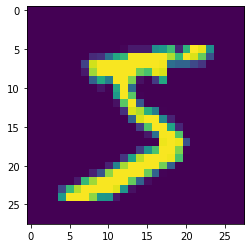

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train /255

In [ ]:
X_test = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
28*28

784

In [ ]:
784/2

392.0

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [ ]:
25/784

0.03188775510204082

In [ ]:
decoder = Sequential()
decoder.add(Dense(50, activation = 'relu', input_shape=[25]))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid')) # sigmoid since basically binary crossentropy loss
decoder.add(Reshape([28,28]))


In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer =SGD(lr=1.5), 
                    metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
autoencoder.fit(X_train,X_train, epochs = 5, validation_data =[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2480 - accuracy: 0.0904 - val_loss: 0.2035 - val_accuracy: 0.1394
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1786 - accuracy: 0.1697 - val_loss: 0.1603 - val_accuracy: 0.1947
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1532 - accuracy: 0.2049 - val_loss: 0.1476 - val_accuracy: 0.2179
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1451 - accuracy: 0.2193 - val_loss: 0.1404 - val_accuracy: 0.2262
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1403 - accuracy: 0.2280 - val_loss: 0.1377 - val_accuracy: 0.2356


In [ ]:
passed_images = autoencoder.predict(X_test[:10])

original image


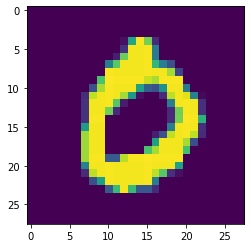

attempted reconstruction(after autoencoder


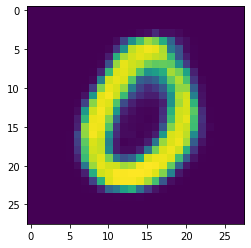

In [ ]:
n= 3

print("original image")
plt.imshow(X_test[n])
plt.show()
print("attempted reconstruction(after autoencoder")
plt.imshow(passed_images[n])

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[:10], training = True)

original


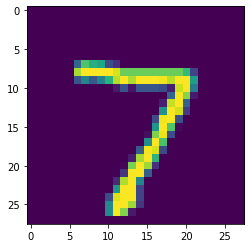

noise version


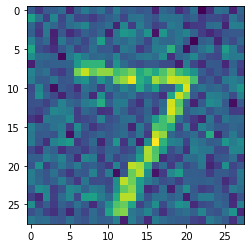

In [ ]:
n = 0

print("original")
plt.imshow(X_test[n])
plt.show()
print("noise version")
plt.imshow(noisey[n])
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50, activation = 'relu', input_shape=[25]))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid')) # sigmoid since basically binary crossentropy loss
decoder.add(Reshape([28,28]))


In [ ]:
noise_remover = Sequential([encoder, decoder])

In [ ]:
noise_remover.compile(loss = 'binary_crossentropy', 
                      optimizer = 'adam', 
                      metrics = ['accuracy'])

In [ ]:
noise_remover.fit(X_train, X_train, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1695 - accuracy: 0.1824
Epoch 2/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1305 - accuracy: 0.2329
Epoch 3/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1214 - accuracy: 0.2452
Epoch 4/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1169 - accuracy: 0.2528
Epoch 5/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1131 - accuracy: 0.2585
Epoch 6/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1104 - accuracy: 0.2631
Epoch 7/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1084 - accuracy: 0.2669
Epoch 8/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1068 - accuracy: 0.2694


In [ ]:
ten_noisey_images = sample(X_test[:10], training = True)

In [ ]:
denoised = noise_remover(ten_noisey_images)

Original Image


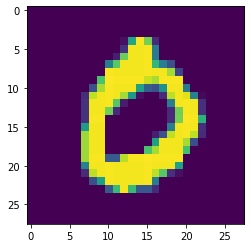

Noise added Image


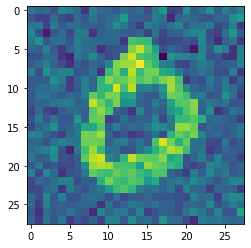

After Noise removed from Autoencoder


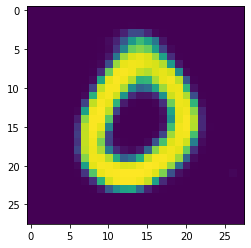

In [ ]:
n= 3

print('Original Image')
plt.imshow(X_test[n])
plt.show()
print("Noise added Image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After Noise removed from Autoencoder")
plt.imshow(denoised[n])
plt.show()